In [177]:
#Ethanol and its mixtures with water - Determination of the density and alcoholic strength - Glass densimeter method
#ABNT NBR 5992 - 17.12.2008
def EtOH_Dens(xm,T):
  # Alcoholic curve with reference temperature = 20°C
  Tr = 20

  #Coefficients of Bettin e Spieweck (1990)
  A =[913.76673,-221.75948,-59.61786,146.82019,-566.5175,621.18006,3782.4439,-9745.3133,-9573.4653,32677.808,8763.7383,-39026.437]

  B =[-0.794376,-0.001217,3.5017833e-6,1.770944e-7,-3.4138828e-9,-9.9880242e-11]

  C =[[-0.39158709, -0.000120832, -3.8683211e-5, -5.6024906e-7, -1.444174e-8],
  [1.1518337, -0.005746625, -0.000209114, -1.2649169e-6, 1.3470542e-8],
  [-5.0416999, 0.12030894, 0.002671389, 3.486395e-6, 0],
  [13.381608, -0.23519694, 0.004104205, -1.5168726e-6, 0],
  [4.5899913, -1.0362738, -0.049364385, 0, 0],
  [-118.21, 2.1804505, -0.017952946, 0, 0],
  [190.5402, 4.2763108, 0.29012506, 0, 0],
  [339.81954, -6.8624848, 0.023001712, 0, 0],
  [-900.32344, -6.9384031, -0.54150139, 0, 0],
  [-349.32012, 7.4460428, 0, 0, 0],
  [1285.9318, 0, 0, 0, 0]]

  m  = [11,10,9,4,2]
  n  = 5

  #Define ranges of composition (mass percentage) and temperature (ºC)
  if (xm<0 or xm>100) & (T<-20 or T>50):
    return print('Error! The composition must be between 0 and 100 % and temperature must be between  -20 and 50 ºC')
  elif T<-20 or T>50:
    return print('Error! The temperature range must be between -20 and 50 ºC')
  elif xm<0 or xm>100:
    return print('Error! The composition range must be between 0 and 100 %')
  else:
    #print('Nice! The composition and temperature are within the ranges') 

    #Specific mass calculation
    sum1=0
    sum2=0
    sum3=0

    #Calculate the first summation (composition)
    for k in range(1, len(A)):
      sum1=sum1+A[k]*(xm/100-0.5)**(k) #Calculate the first summation (composition)

    #Calculate the second summation (temperature)
    for k in range(0, len(B)):
      sum2=sum2+B[k]*(T-Tr)**(k+1)

    #Calculate the third summation (composition and temperature)
    for i in range(0,n):
      for k in range(0,m[i]):
        sum3=sum3+C[k][i]*(xm/100-0.5)**(k+1)*(T-Tr)**(i+1)

    #Calculate the specific mass
    D = A[0]+sum1+sum2+sum3
    #print("Ethanol mixture specific mass ({:.1f} %, {:.1f} ºC)= {:.2f} kg/m³".format(xm,T,D))
    return D

In [178]:
#Calculate the volumetric composition
def EtOH_GL(xm,D):
    T  = 20
    xV = xm*D/789.23
    #print("Ethanol mixture volumetric percentage ({:.1f} %, {:.1f} ºC)= {:.2f} ºGL".format(xm,T,xv))
    return xV

In [179]:
#Calculate the volume correction factor (VCF)
def EtOH_VCF(D,D20,T):
    VCF = D/D20*(1+3.6e-5*(T-20))
    #print("Ethanol mixture volume correction factor ({:.1f} %, {:.1f} ºC)= {:.3f}".format(xm,T,VCF))
    return VCF

In [180]:
#Define xm  (mass percentage) and temperature (ºC) for example
xm = 69
T  = 48

#Calculate
D  = EtOH_Dens(xm,T)  #Specific mass at temperature T
D20= EtOH_Dens(xm,20) #Specific mass at temperature 20 ºC
GL = EtOH_GL(xm,D20)  #Volumetric percentage at 20 ºC
VCF= EtOH_VCF(D,D20,T)#Volume correction factor at temperature T

In [181]:
#Results summary
from tabulate import tabulate
results = [["Temperature (ºC)", T],
        ["Mass percentage (%)", xm], 
        ["Volume percentage (%)", GL], 
        ["Volume correction factor", VCF], 
        ["Specific mass (kg/m³)", D]]
col_names = ["Parameter", "Value"]
print(tabulate(results, headers=col_names, tablefmt="fancy_grid", stralign='left', numalign='right', floatfmt=".3f"))

╒══════════════════════════╤═════════╕
│ Parameter                │   Value │
╞══════════════════════════╪═════════╡
│ Temperature (ºC)         │  48.000 │
├──────────────────────────┼─────────┤
│ Mass percentage (%)      │  69.000 │
├──────────────────────────┼─────────┤
│ Volume percentage (%)    │  76.060 │
├──────────────────────────┼─────────┤
│ Volume correction factor │   0.973 │
├──────────────────────────┼─────────┤
│ Specific mass (kg/m³)    │ 845.368 │
╘══════════════════════════╧═════════╛


In [182]:
#graphs of specific mass
import numpy as np
import matplotlib.pyplot as plt

#Define temperature (T) and composition range (xs)
T = np.linspace(-20, 50, num=10)
xs = [0,25,50,75,100]

#Define a matrix to store the results
ds = np.zeros((len(T),len(xs)))

#Generate the specific mass for each xs and T
for i in range(0,len(xs)):
    for j in range(0,len(T)):
        ds[j][i] = EtOH_Dens(xs[i],T[j])

#Define each column of ds
dw = np.zeros(len(T))
ds25 = np.zeros(len(T))
ds50 = np.zeros(len(T))
ds75 = np.zeros(len(T))
de = np.zeros(len(T))

#Get each column of ds
for i in range(0,len(T)):
    dw[i] = ds[i][0]
    ds25[i] = ds[i][1]
    ds50[i] = ds[i][2]
    ds75[i] = ds[i][3]
    de[i] = ds[i][4]

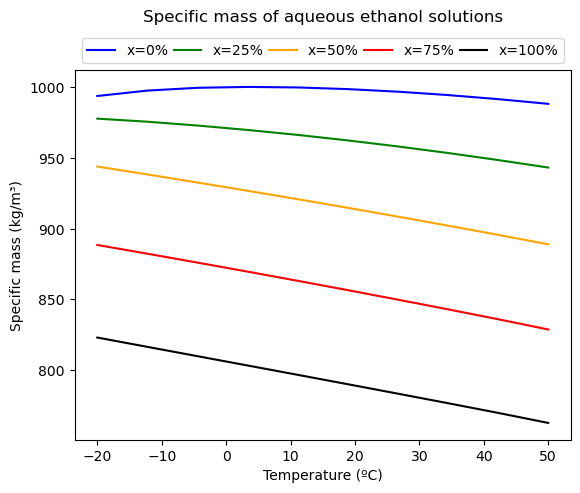

In [183]:
#plot the specific mass
plt.plot(T, dw,'-', color='blue', label = 'x=0%')
plt.plot(T, ds25,'-', color='green', label = 'x=25%')
plt.plot(T, ds50,'-', color='orange', label = 'x=50%')
plt.plot(T, ds75,'-', color='red', label = 'x=75%')
plt.plot(T, de,'-', color='black', label = 'x=100%')

#Define the plot parameters
plt.title('Specific mass of aqueous ethanol solutions', pad = 35)
plt.xlabel('Temperature (ºC)')
plt.ylabel('Specific mass (kg/m³)')
plt.legend(bbox_to_anchor=(0, 1, 1, 1), loc="lower left", mode="expand", ncol=5)

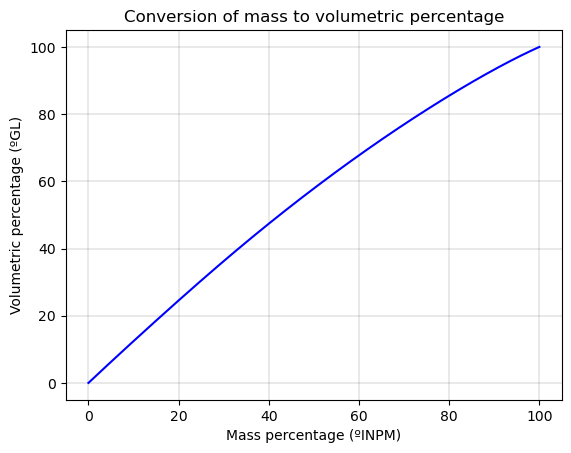

In [184]:
#calculate the specific mass at 20ºC and volumetric composition
x = np.linspace(0,100,500)
d20 = np.zeros(len(x))
xv = np.zeros(len(x))
for i in range(0,len(x)):
    d20[i] = EtOH_Dens(x[i],20)
    xv[i] = EtOH_GL(x[i],d20[i])

#Define the plot parameters  
plt.plot(x, xv,'-', color='blue')
plt.title('Conversion of mass to volumetric percentage')
plt.xlabel('Mass percentage (ºINPM)')
plt.ylabel('Volumetric percentage (ºGL)')
plt.grid(which='major', axis='both', linestyle='-', linewidth=0.125, color = 'black')

In [185]:
#Evaluate VCF in some temperatures TVCF
Tvcf = [-20,-10,0,10,20,30,40,50]

#Define the specific mass and VCF vectors
d = np.zeros((len(x),len(Tvcf)))
vcf = np.zeros((len(x),len(Tvcf)))

#Calculate the specific mass and VCF
for j in range(0,len(Tvcf)):
    for i in range(0,len(x)):
        d[i][j] = EtOH_Dens(x[i],Tvcf[j])
        vcf[i][j] = EtOH_VCF(d[i][j],d20[i],Tvcf[j])

#Define each column of ds
vcf_20= np.zeros(len(x))
vcf_10= np.zeros(len(x))
vcf0  = np.zeros(len(x))
vcf10 = np.zeros(len(x))
vcf20 = np.zeros(len(x))
vcf30 = np.zeros(len(x))
vcf40 = np.zeros(len(x))
vcf50 = np.zeros(len(x))

#Get each column of ds
for i in range(0,len(x)):
    vcf_20[i]= vcf[i][0]
    vcf_10[i]= vcf[i][1]
    vcf0[i]  = vcf[i][2]
    vcf10[i] = vcf[i][3]
    vcf20[i] = vcf[i][4]
    vcf30[i] = vcf[i][5]
    vcf40[i] = vcf[i][6]
    vcf50[i] = vcf[i][7]

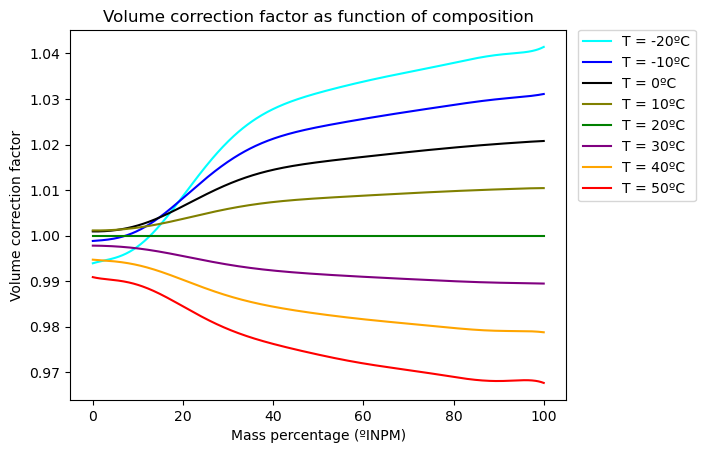

In [192]:
#plot the VCF and composition for each temperature
plt.plot(x, vcf_20,'-', color='cyan', label = 'T = -20ºC')
plt.plot(x, vcf_10,'-', color='blue', label = 'T = -10ºC')
plt.plot(x, vcf0,'-', color='black', label = 'T = 0ºC')
plt.plot(x, vcf10,'-', color='olive', label = 'T = 10ºC')
plt.plot(x, vcf20,'-', color='green', label = 'T = 20ºC')
plt.plot(x, vcf30,'-', color='purple', label = 'T = 30ºC')
plt.plot(x, vcf40,'-', color='orange', label = 'T = 40ºC')
plt.plot(x, vcf50,'-', color='red', label = 'T = 50ºC')

#Define the plot parameters
plt.title('Volume correction factor as function of composition')
plt.xlabel('Mass percentage (ºINPM)')
plt.ylabel('Volume correction factor')
plt.legend(bbox_to_anchor=( 1.275, 1.02))

In [187]:
#TEste
